make some synthetic friges using Airy formulae  

I'm seeing some odd patterns when I test synthetic fringes across a large range of fringe fractions  

This separates out just this code so I can debug  


In [1]:
from pathlib import Path

import random
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph
from ls_fringeapp import synthetic_images as si

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [2]:
# test every 0.1 of a fringe
img_size = (800, 400)
gb_size = (600, 200)
spacing = 100
offset = 0
ffracs1 = []
for ffrac_set in np.arange(0, 1, 0.01):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs1.append([ffrac_set, ffrac_calc])

ffracs1 = np.array(ffracs1)

diff1 = ffracs1[:, 1] - ffracs1[:, 0]
print(f"{diff1.shape=}")
print(f"{diff1.mean()=}")
print(f"{diff1.std(ddof=1)=}")
print(f"{diff1.max()=}")
print(f"{diff1.min()=}")

diff1.shape=(100,)
diff1.mean()=np.float64(2.5299045421735794e-06)
diff1.std(ddof=1)=np.float64(0.00028699911616897035)
diff1.max()=np.float64(0.0005147582003061646)
diff1.min()=np.float64(-0.0005072022651207986)


In [10]:
# pick fringe fraction randommly between 0+e, 1-e to avoid rollover non-equivalence
n_tests = 100
ffracs2 = []
margin = 0.005
for i in range(n_tests):
    ffrac_set = random.uniform(0.0 + margin, 1.0 - margin)
    spacing = 100
    offset = 0

    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs2.append([ffrac_set, ffrac_calc])

ffracs2 = np.array(ffracs2)

diff2 = ffracs2[:, 1] - ffracs2[:, 0]
print(f"{diff2.shape=}")
print(f"{diff2.mean()=}")
print(f"{diff2.std(ddof=1)=}")
print(f"{diff2.max()=}")
print(f"{diff2.min()=}")

diff2.shape=(100,)
diff2.mean()=np.float64(-9.60827100486324e-05)
diff2.std(ddof=1)=np.float64(0.002764667752567353)
diff2.max()=np.float64(0.005042588561357864)
diff2.min()=np.float64(-0.004870096277914321)


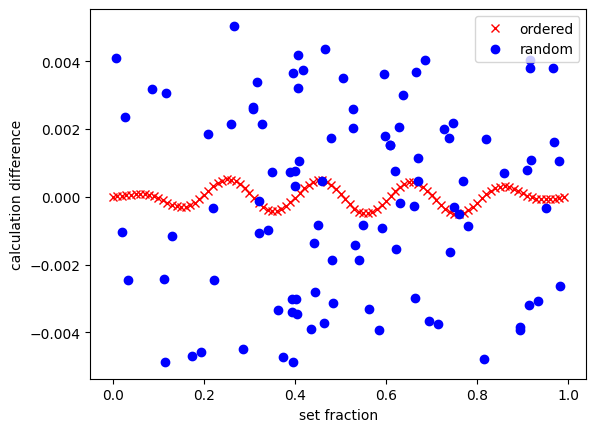

In [17]:
plt.plot(ffracs1[:, 0], diff1, "rx", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "bo", label="random")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

This is crazy unordered results have 10 times larger spread than ordered!!!!

In [21]:
# stupidly create a random vector and sort it
ffrac_sorted = np.random.uniform(0.0 + margin, 1.0 - margin, 100)
ffrac_sorted.sort()

In [22]:
ffracs3 = []
for ffrac_set in ffrac_sorted:
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs3.append([ffrac_set, ffrac_calc])

ffracs3 = np.array(ffracs3)

diff3 = ffracs3[:, 1] - ffracs3[:, 0]
print(f"{diff3.shape=}")
print(f"{diff3.mean()=}")
print(f"{diff3.std(ddof=1)=}")
print(f"{diff3.max()=}")
print(f"{diff3.min()=}")

diff3.shape=(100,)
diff3.mean()=np.float64(-7.283325565912686e-05)
diff3.std(ddof=1)=np.float64(0.0028270337125590387)
diff3.max()=np.float64(0.005324058128173437)
diff3.min()=np.float64(-0.005386912297745461)


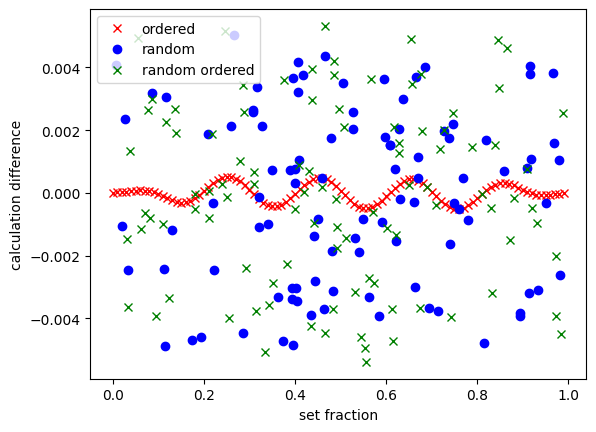

In [24]:
plt.plot(ffracs1[:, 0], diff1, "rx", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "bo", label="random")
plt.plot(ffracs3[:, 0], diff3, "gx", label="random ordered")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

Its not the ordering (unsurprising). Does it change if I cange the spacing? I'm thinking pixel round off.

In [29]:
# test every 0.1 of a fringe

spacing = 111

ffracs4 = []
for ffrac_set in np.arange(0, 0.85, 0.01):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs4.append([ffrac_set, ffrac_calc])

ffracs4 = np.array(ffracs4)

diff4 = ffracs4[:, 1] - ffracs4[:, 0]
print(f"{diff4.shape=}")
print(f"{diff4.mean()=}")
print(f"{diff4.std(ddof=1)=}")
print(f"{diff4.max()=}")
print(f"{diff4.min()=}")

diff4.shape=(85,)
diff4.mean()=np.float64(0.09916549344265639)
diff4.std(ddof=1)=np.float64(0.0026004733235124606)
diff4.max()=np.float64(0.10367780508942448)
diff4.min()=np.float64(0.09441709852812363)


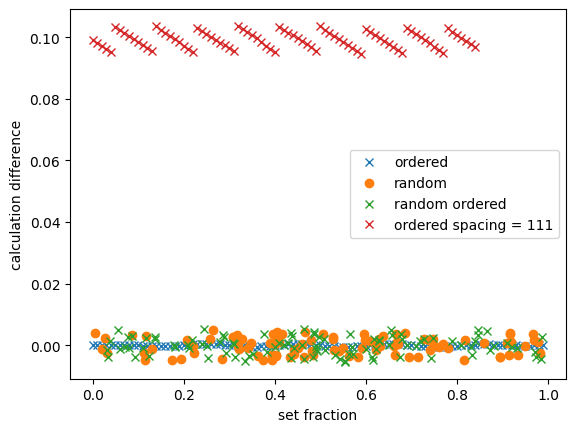

In [31]:
plt.plot(ffracs1[:, 0], diff1, "x", label="ordered")
plt.plot(ffracs2[:, 0], diff2, "o", label="random")
plt.plot(ffracs3[:, 0], diff3, "x", label="random ordered")
plt.plot(ffracs4[:, 0], diff4, "x", label="ordered spacing = 111")
plt.xlabel("set fraction")
plt.ylabel("calculation difference")
plt.legend()

In [34]:
np.argmax(diff4)

np.int64(32)

In [35]:
ffracs4[32, :]

array([0.32      , 0.42367781])

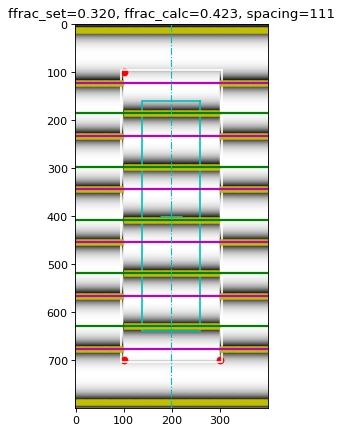

In [39]:
ffrac_set = 0.32
spaing = 111
offset = 10
a1, gb_yx = si.synthetic_image_with_gauge(
    spacing,
    offset,
    ffrac_set,
    img_size,
    gb_size,
)
ffrac_calc, drawdata = fp.array2frac(a1, gb_yx, drawinfo=True)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(f"{ffrac_set=:.3f}, {ffrac_calc=:.3f}, {spacing=}")
ph.draw_gauge(axes, a1, drawdata)

(np.float64(-0.5), np.float64(399.5), np.float64(799.5), np.float64(-0.5))

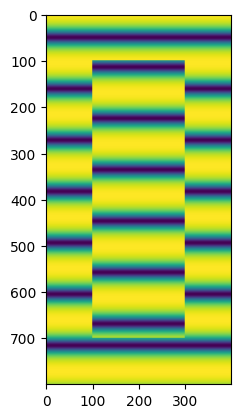

In [38]:
plt.imshow(a1)
plt.axis("image")

In [40]:
# loop over offset for constant spacing and fringe fraction
spacing = 111
ffrac_set = 0.32

ffracs5 = []
for offset in np.arange(0, 111, 5):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs5.append([offset, ffrac_calc])

ffracs5 = np.array(ffracs5)


In [41]:
diff5 = ffracs5[:, 1] - ffrac_set
print(f"{diff5.shape=}")
print(f"{diff5.mean()=}")
print(f"{diff5.std(ddof=1)=}")
print(f"{diff5.max()=}")
print(f"{diff5.min()=}")

diff5.shape=(23,)
diff5.mean()=np.float64(0.10346533977979722)
diff5.std(ddof=1)=np.float64(0.00023141594940460626)
diff5.max()=np.float64(0.10385324626821313)
diff5.min()=np.float64(0.10289829589000843)


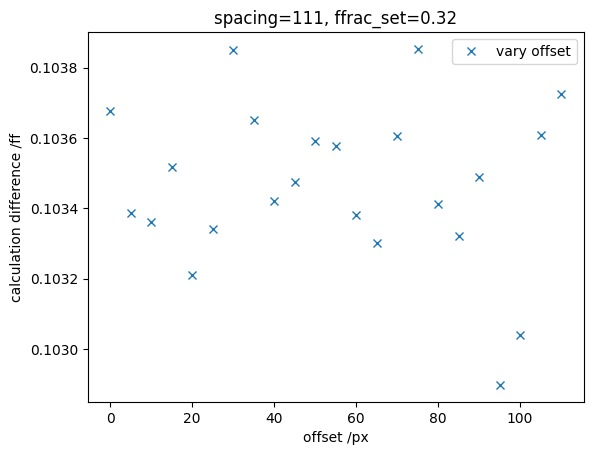

In [42]:
plt.plot(ffracs5[:, 0], diff5, "x", label="vary offset")

plt.xlabel("offset /px")
plt.ylabel("calculation difference /ff")
plt.title(f"{spacing=}, {ffrac_set=}")
plt.legend()

In [45]:
# loop overspacin for constant offset and fringe fraction
offset = 0
ffrac_set = 0.32

ffracs6 = []
for spacing in np.arange(80, 120, 2):
    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    ffrac_calc = fp.array2frac(a1, gb_yx, drawinfo=False)
    ffracs6.append([spacing, ffrac_calc])

ffracs6 = np.array(ffracs6)

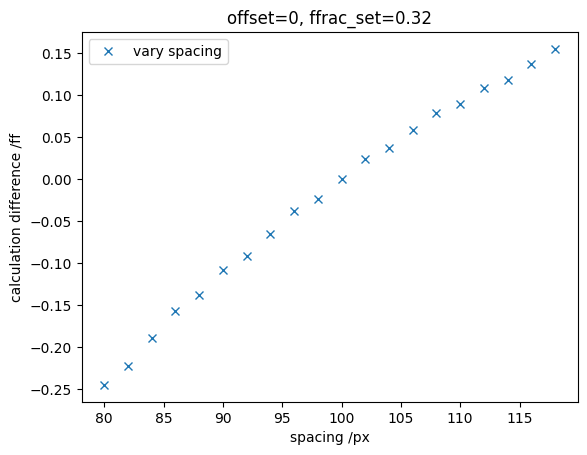

In [46]:
diff6 = ffracs6[:, 1] - ffrac_set
plt.plot(ffracs6[:, 0], diff6, "x", label="vary spacing")

plt.xlabel("spacing /px")
plt.ylabel("calculation difference /ff")
plt.title(f"{offset=}, {ffrac_set=}")
plt.legend()

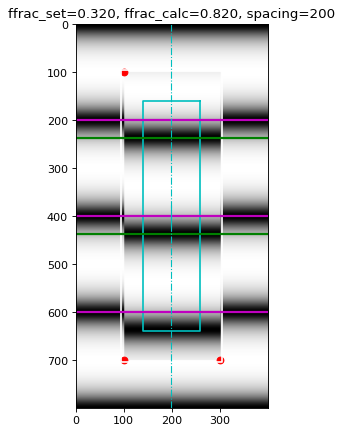

In [51]:
ffrac_set = 0.32
spacing = 200
offset = 0
a1, gb_yx = si.synthetic_image_with_gauge(
    spacing,
    offset,
    ffrac_set,
    img_size,
    gb_size,
)
ffrac_calc, drawdata = fp.array2frac(a1, gb_yx, drawinfo=True)
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(f"{ffrac_set=:.3f}, {ffrac_calc=:.3f}, {spacing=}")
ph.draw_gauge(axes, a1, drawdata, peaks=False)

(np.float64(-0.5), np.float64(399.5), np.float64(799.5), np.float64(-0.5))

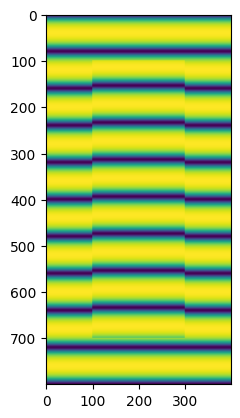

In [50]:
plt.imshow(a1)
plt.axis("image")

The syntheic image code must be wrong, this looks like calculated not set!!

In [54]:
ffrac_set = 0.32
spacing = 200
offset = 0
img_array = si.synthetic_fringes(
    spacing,
    offset,
    img_size,
)
# convert to PIL image
img = Image.fromarray(img_array)
# make a copy so the  orignal image is not altered
img2 = img.copy()
yshift = (1, 0, 0, 0, 1, ffrac_set * spacing)
img3 = img2.transform(img2.size, Image.Transform.AFFINE, data=yshift)

In [61]:
np.asarray(img).max(), np.asarray(img).min()

(np.float32(66.666664), np.float32(25.0))

Text(0.5, 1.0, 'transfom spacing=200, ffrac_set=0.32')

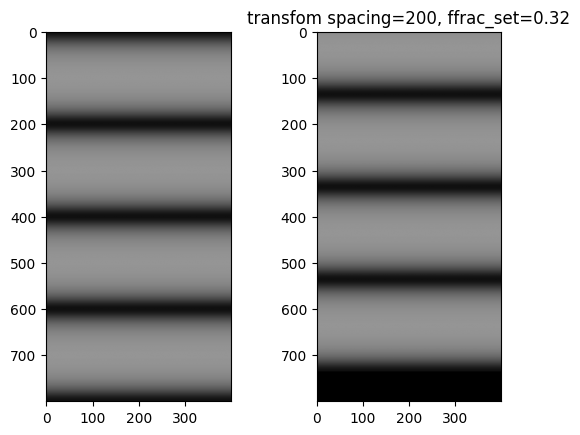

In [66]:
fig = plt.figure()


ax1 = fig.add_subplot(121)
ax1.imshow(np.asarray(img), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax1.axis("image")

ax2 = fig.add_subplot(122)
ax2.imshow(np.asarray(img3), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax2.axis("image")
plt.title(f"transfom {spacing=}, {ffrac_set=}")

In [71]:
gb_box = (0, 0, gb_size[1], gb_size[0])
img4 = img3.crop(gb_box)

In [75]:
top_left = ((img.size[0] - gb_size[1]) // 2, (img.size[1] - gb_size[0]) // 2)
img2.paste(img4, top_left)

Text(0.5, 1.0, 'transfom spacing=200, ffrac_set=0.32')

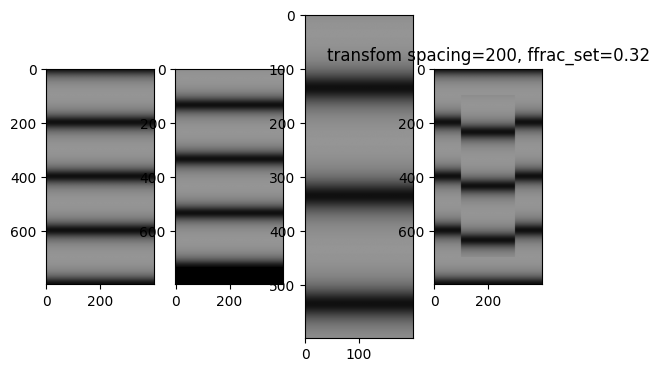

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(141)
ax1.imshow(np.asarray(img), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax1.axis("image")

ax2 = fig.add_subplot(142)
ax2.imshow(np.asarray(img3), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax2.axis("image")

ax3 = fig.add_subplot(143)
ax3.imshow(np.asarray(img4), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax3.axis("image")

ax4 = fig.add_subplot(144)
ax4.imshow(np.asarray(img2), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax4.axis("image")


plt.title(f"transfom {spacing=}, {ffrac_set=}")

In [79]:
top_left = ((img.size[0] - gb_size[1]) // 2, (img.size[1] - gb_size[0]) // 2)
gb_box = (top_left[0], top_left[1], top_left[0] + gb_size[1], top_left[1] + gb_size[0])
gb_box


(100, 100, 300, 700)

In [80]:
img4 = img3.crop(gb_box)


In [81]:
img2 = img.copy()
img2.paste(img4, top_left)

Text(0.5, 1.0, 'transfom spacing=200, ffrac_set=0.32')

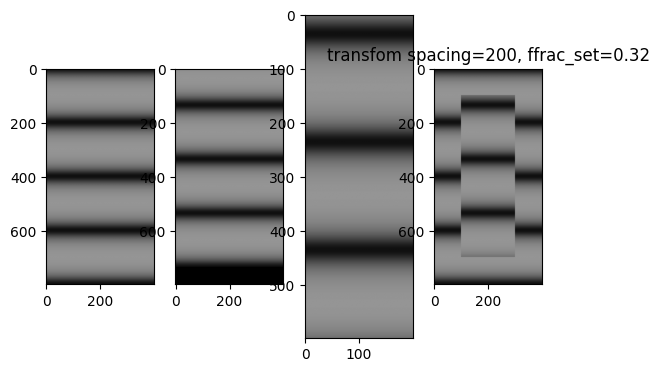

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(141)
ax1.imshow(np.asarray(img), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax1.axis("image")

ax2 = fig.add_subplot(142)
ax2.imshow(np.asarray(img3), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax2.axis("image")

ax3 = fig.add_subplot(143)
ax3.imshow(np.asarray(img4), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax3.axis("image")

ax4 = fig.add_subplot(144)
ax4.imshow(np.asarray(img2), cmap=matplotlib.cm.gray, vmin=20, vmax=100)
ax4.axis("image")


plt.title(f"transfom {spacing=}, {ffrac_set=}")